In [2]:
import random


def simulate_optimal(trace, cache_size):
    cache = set()
    page_faults = 0

    for i, page in enumerate(trace):
        if page in cache:
            continue

        page_faults += 1

        if len(cache) < cache_size:
            cache.add(page)
        else:
            # 미래에 가장 나중에 다시 사용될 페이지를 찾아서 제거
            future_uses = {p: float('inf') for p in cache}
            for j in range(i + 1, len(trace)):
                if trace[j] in future_uses and future_uses[trace[j]] == float('inf'):
                    future_uses[trace[j]] = j
            page_to_evict = max(future_uses, key=future_uses.get)
            cache.remove(page_to_evict)
            cache.add(page)

    hit_rate = (1 - page_faults / len(trace)) * 100
    return page_faults, hit_rate


# 예시용 trace
if __name__ == "__main__":
    random.seed(42)  # 결과 재현 가능하도록 설정
    trace = [random.randint(1, 10) for _ in range(10)]
    cache_size = 3

    page_faults, hit_rate = simulate_optimal(trace, cache_size)

    print("Optimal Page Replacement Simulation")
    print(f"Access Trace: {trace}")
    print(f"Cache Size: {cache_size}")
    print(f"Page Faults: {page_faults}")
    print(f"Hit Rate: {hit_rate:.2f}%")

Optimal Page Replacement Simulation
Access Trace: [2, 1, 5, 4, 4, 3, 2, 9, 2, 10]
Cache Size: 3
Page Faults: 7
Hit Rate: 30.00%


In [3]:
import random

# Optimal Page Replacement Algorithm (Belady's MIN)


def simulate_optimal(trace, cache_size):
    cache = set()
    page_faults = 0

    for i, page in enumerate(trace):
        if page in cache:
            continue

        page_faults += 1

        if len(cache) < cache_size:
            cache.add(page)
        else:
            # Find the page that will be used farthest in the future
            future_uses = {p: float('inf') for p in cache}
            for j in range(i + 1, len(trace)):
                if trace[j] in future_uses and future_uses[trace[j]] == float('inf'):
                    future_uses[trace[j]] = j
            page_to_evict = max(future_uses, key=future_uses.get)
            cache.remove(page_to_evict)
            cache.add(page)

    hit_rate = (1 - page_faults / len(trace)) * 100
    return page_faults, hit_rate


# Example trace
if __name__ == "__main__":
    random.seed(42)  # For reproducibility
    trace = [random.randint(1, 10) for _ in range(30)]
    cache_size = 4

    page_faults, hit_rate = simulate_optimal(trace, cache_size)

    print("Optimal Page Replacement Simulation")
    print(f"Access Trace: {trace}")
    print(f"Cache Size: {cache_size}")
    print(f"Page Faults: {page_faults}")
    print(f"Hit Rate: {hit_rate:.2f}%")

Optimal Page Replacement Simulation
Access Trace: [2, 1, 5, 4, 4, 3, 2, 9, 2, 10, 7, 1, 1, 2, 4, 4, 9, 10, 1, 9, 4, 9, 7, 4, 8, 10, 5, 1, 3, 7]
Cache Size: 4
Page Faults: 14
Hit Rate: 53.33%


Optimal Page Replacement Simulation
Access Trace: [1, 2, 3, 2, 4, 1, 5, 2, 1, 4, 3, 2, 1, 5, 4]
Cache Size: 4
Page Faults: 7
Total Hits: 8
Hit Rate: 53.33%


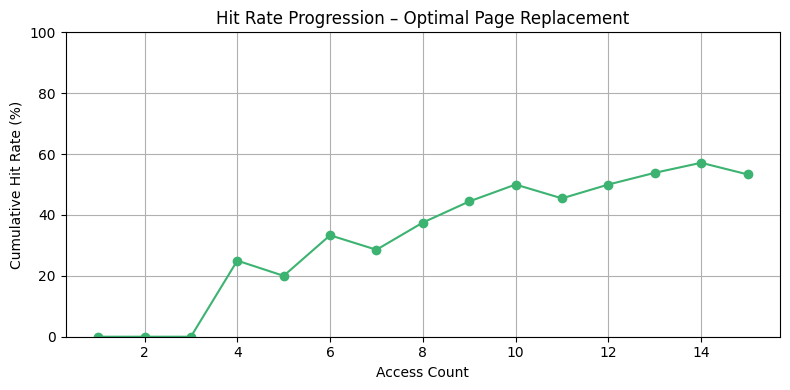

In [2]:
import random
import matplotlib.pyplot as plt

# Optimal Page Replacement Algorithm (Belady's MIN)


def simulate_optimal(trace, cache_size):
    cache = set()
    page_faults = 0
    hits = 0
    hit_rates = []  # to track hit rate progression

    for i, page in enumerate(trace):
        if page in cache:
            hits += 1
        else:
            page_faults += 1
            if len(cache) < cache_size:
                cache.add(page)
            else:
                # Find the page that will be used farthest in the future
                future_uses = {p: float('inf') for p in cache}
                for j in range(i + 1, len(trace)):
                    if trace[j] in future_uses and future_uses[trace[j]] == float('inf'):
                        future_uses[trace[j]] = j
                page_to_evict = max(future_uses, key=future_uses.get)
                cache.remove(page_to_evict)
                cache.add(page)

        # Track cumulative hit rate at this point
        current_hit_rate = (hits / (i + 1)) * 100
        hit_rates.append(current_hit_rate)

    final_hit_rate = (hits / len(trace)) * 100
    return page_faults, hits, final_hit_rate, hit_rates


# Example trace
if __name__ == "__main__":
    random.seed(42)  # For reproducibility
    # trace = [random.randint(1, 10) for _ in range(30)]
    trace = [1, 2, 3, 2, 4, 1, 5, 2, 1, 4, 3, 2, 1, 5, 4]
    cache_size = 4

    page_faults, total_hits, hit_rate, hit_rate_progress = simulate_optimal(
        trace, cache_size)

    # Print summary
    print("Optimal Page Replacement Simulation")
    print(f"Access Trace: {trace}")
    print(f"Cache Size: {cache_size}")
    print(f"Page Faults: {page_faults}")
    print(f"Total Hits: {total_hits}")
    print(f"Hit Rate: {hit_rate:.2f}%")

    # Plot hit rate progression
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(trace) + 1), hit_rate_progress,
             marker='o', linestyle='-', color='mediumseagreen')
    plt.title('Hit Rate Progression – Optimal Page Replacement')
    plt.xlabel('Access Count')
    plt.ylabel('Cumulative Hit Rate (%)')
    plt.ylim(0, 100)
    plt.grid(True)
    plt.tight_layout()
    plt.show()